# Intrpretaion score get

In [51]:
import os
os.sys.path.append("/home/kakarot/Workspace/InterFusion/")

In [52]:
import pickle
import os

import logging
import time
import numpy as np


In [53]:
import pandas as pd

# Data Prep for GA data [ignore for now]

In [40]:
df_ga = pd.read_csv("data/Google_Anlaytics/GA_MTS - GA_MTS.csv")
df_ga.head()

,country,h6Seq,cnt_per_country_and_6h,pageviews,bounce_rate,interactive_visit_rate,Chrome,Safari,Firefox,Other_browsers,desktop,mobile,tablet,Macintosh,Windows,Android,iOS,Linux,Other_OS
0,Afghanistan,58,1,1,1.0,1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1,Afghanistan,85,1,2,0.0,1,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
2,Afghanistan,91,1,3,0.0,1,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
3,Afghanistan,154,1,1,1.0,1,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,Afghanistan,213,1,2,0.0,1,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0


In [42]:
# filter for India
df = df_ga[df_ga["country"]=="India"].reset_index().drop(columns=["interactive_visit_rate","index","country","h6Seq","Other_browsers","Other_OS"]).copy()
print(df.shape)
df.head()

(1464, 14)


,cnt_per_country_and_6h,pageviews,bounce_rate,Chrome,Safari,Firefox,desktop,mobile,tablet,Macintosh,Windows,Android,iOS,Linux
0,25,68,0.560,60.000,12.00,24.00,88.000,12.000,0.00,12.0,52.00,8.000,4.00,24.000
1,16,71,0.563,81.250,18.75,0.00,75.000,25.000,0.00,25.0,31.25,18.750,6.25,6.250
2,10,24,0.800,40.000,50.00,0.00,80.000,20.000,0.00,50.0,10.00,20.000,0.00,10.000
3,16,45,0.625,50.000,25.00,18.75,87.500,6.250,6.25,25.0,62.50,6.250,6.25,0.000
4,12,22,0.417,66.667,25.00,0.00,83.333,16.667,0.00,25.0,50.00,16.667,0.00,8.333


In [44]:
# train is test
# train_split = 0.6
# train_rows = int(df.shape[0] * train_split)
X_train = df
X_test = df

In [46]:
dataset_name = "ga-1-2"

In [48]:
# dump train data. 
with open("data/processed/"+dataset_name+"_train.pkl", 'wb') as file:
    pickle.dump(X_train.to_numpy(), file)

In [49]:
# dump test data. 
with open("data/processed/"+dataset_name+"_test.pkl", 'wb') as file:
    pickle.dump(X_test.to_numpy(), file)

In [50]:
# dump test_label data. 
# this is random. 

test_label = np.random.randint(2, size=X_test.shape[0])
with open("data/processed/"+dataset_name+"_test_label.pkl", 'wb') as file:
    pickle.dump(test_label, file)

In [54]:
print(X_train.to_numpy().shape)
print(X_test.to_numpy().shape)
print(test_label.shape)

(1464, 14)
(1464, 14)
(1464,)


In [32]:
# # testing
# import pickle 

# with open("../../data/processed/omi-1_train.pkl", 'rb') as pickle_file:
#     content = pickle.load(pickle_file)

In [69]:
# testing
import pickle 

with open("../../data/processed/omi-1_test_label.pkl", 'rb') as pickle_file:
    content = pickle.load(pickle_file)

print(content.shape)

(4320,)


# interpret?? 

In [4]:
%cd ../..

/home/kakarot/Workspace/InterFusion


In [55]:
!ls

LICENSE  README.md  algorithm  data  explib  requirements.txt  results


In [56]:
dataset = "ga-1-2"

In [8]:
#path += '/'
# load labels
f = open("./data/processed/" + dataset + "_test_label.pkl", "rb")

In [9]:
test_label = pickle.load(f).reshape((-1))
test_label

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
f.close()

In [11]:
label_dir = './data/interpretation_label/' + dataset + '.txt'
try:
    labels = str(open(label_dir, 'rb').read(), encoding='utf8')
except:
    raise FileNotFoundError('cannot find label via path: ' + label_dir)

In [12]:
# parse labels
labels = labels.split('\n')
if len(labels[-1]) == 0:
    labels = labels[:-1]
intervals = []
dims = []

We get actuals/ ground truth from the respective files.
The format is index labels and thier column number which resulted in the anomlay. 

[Row Index range]  : [Column number/index]

[760-765]  :[4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [13]:
labels

['760-765:4,5,7,8,9,10,11,12,13,14,15,16,17,18,19',
 '1064-1298:6,7,9,10,11,12,13,14,15,16,17,18,19',
 '2758-2772:5,6,7,8,9,10,11,12,13,14,15,16,17,18,19',
 '2874-2885:7,9,10,11,12,13,14,15,16,17,18',
 '3012-3025:7,10,11,12,13,14,15,16,17,18,19',
 '3160-3305:8,9,10,11,12,13,14,15,16,17,18,19',
 '3626-3638:7,9,10,11,12,13,14,15,16,17,18,19']

In [14]:
for i in labels:
    t = i.split(':')
    assert len(t) == 2
    intervals.append([int(_) for _ in t[0].split('-')])
    assert len(intervals[-1]) == 2
    dims.append([int(_) for _ in t[1].split(',')])

In [15]:
dims

[[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

In [16]:
intervals

[[760, 765],
 [1064, 1298],
 [2758, 2772],
 [2874, 2885],
 [3012, 3025],
 [3160, 3305],
 [3626, 3638]]

In [17]:
assert len(intervals) == len(dims)
interpret_dict = {}
tp_res = {}

In [18]:
# form the interpret dict: {(idx_st, idx_ed): interpret_dims}
for _ in range(len(intervals)):
    interpret_dict[tuple(intervals[_])] = dims[_]

In [19]:
# get ground 
interpret_dict

{(760, 765): [4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 (1064, 1298): [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 (2758, 2772): [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 (2874, 2885): [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 (3012, 3025): [7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 (3160, 3305): [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 (3626, 3638): [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [20]:
path = "results/stack_predict_2023-05-16_22-36-22_670/analysis_results/"
mcmc = True
is_pretrain = False
if mcmc:
    assert is_pretrain is False
    try:
        tracker = pickle.load(open(path + 'mcmc_tracker.pkl', 'rb'))
    except:
        raise FileNotFoundError('cannot find mcmc_tracker.pkl',"  ",path)
    # preprocess tracker to get:
    # {idx_ed: best_score_mcmc (np.array(shape=[window_size, x_dim]))}
    for ed_idx in tracker:
        shape = tracker[ed_idx]['best_score'].shape
        assert len(shape) == 3
        tp_res[ed_idx] = tracker[ed_idx]['best_score'].reshape([shape[1], shape[2]])

In [32]:
tp_res

{1197: array([[ 2.0629435e+00,  4.0738764e+00,  3.0340991e+00, ...,
          2.2520440e+00,  2.7543113e+00,  2.4907525e+00],
        [-4.6781220e+00,  4.0590401e+00,  2.9679639e+00, ...,
          2.3387382e+00,  2.9583263e+00,  2.0559907e+00],
        [ 5.7548666e-01,  4.0434561e+00,  3.4127316e+00, ...,
          2.7592311e+00,  3.3323276e+00,  2.0125744e+00],
        ...,
        [ 2.6283927e+00,  4.0378051e+00,  3.4261978e+00, ...,
          2.7694643e+00,  2.0329890e+00,  2.6807189e+00],
        [ 2.6324379e+00,  4.0352335e+00,  3.4109497e+00, ...,
          2.7443702e+00,  2.1542509e+00,  2.6845937e+00],
        [ 2.5397305e+00,  4.0420871e+00, -2.4909897e+03, ...,
          3.8671333e-01,  2.6872156e+00,  2.3182509e+00]], dtype=float32),
 1198: array([[-2.8268371e+00,  4.0737429e+00,  3.0393758e+00, ...,
          2.5427353e+00,  2.7527175e+00,  2.3658950e+00],
        [ 7.6516408e-01,  4.0588365e+00,  2.9746237e+00, ...,
          2.3496990e+00,  2.9595978e+00,  2.0654690e+00]

In [33]:
tp_res[1197].shape

(100, 19)

In [60]:
for ed_idx in tracker:
    shape = tracker[ed_idx]['best_score'].shape
    
    print(tracker[ed_idx]['best_score'].reshape([shape[1], shape[2]]))

[[ 2.0629435e+00  4.0738764e+00  3.0340991e+00 ...  2.2520440e+00
   2.7543113e+00  2.4907525e+00]
 [-4.6781220e+00  4.0590401e+00  2.9679639e+00 ...  2.3387382e+00
   2.9583263e+00  2.0559907e+00]
 [ 5.7548666e-01  4.0434561e+00  3.4127316e+00 ...  2.7592311e+00
   3.3323276e+00  2.0125744e+00]
 ...
 [ 2.6283927e+00  4.0378051e+00  3.4261978e+00 ...  2.7694643e+00
   2.0329890e+00  2.6807189e+00]
 [ 2.6324379e+00  4.0352335e+00  3.4109497e+00 ...  2.7443702e+00
   2.1542509e+00  2.6845937e+00]
 [ 2.5397305e+00  4.0420871e+00 -2.4909897e+03 ...  3.8671333e-01
   2.6872156e+00  2.3182509e+00]]
[[-2.8268371e+00  4.0737429e+00  3.0393758e+00 ...  2.5427353e+00
   2.7527175e+00  2.3658950e+00]
 [ 7.6516408e-01  4.0588365e+00  2.9746237e+00 ...  2.3496990e+00
   2.9595978e+00  2.0654690e+00]
 [ 2.6199877e+00  4.0431805e+00  3.4210353e+00 ...  2.7713389e+00
   3.3252487e+00  1.4443319e+00]
 ...
 [ 2.6262345e+00  4.0377784e+00  3.4347706e+00 ...  2.7847710e+00
   2.0773401e+00  2.6773324e+00]

In [34]:
tp_res

{1197: array([[ 2.0629435e+00,  4.0738764e+00,  3.0340991e+00, ...,
          2.2520440e+00,  2.7543113e+00,  2.4907525e+00],
        [-4.6781220e+00,  4.0590401e+00,  2.9679639e+00, ...,
          2.3387382e+00,  2.9583263e+00,  2.0559907e+00],
        [ 5.7548666e-01,  4.0434561e+00,  3.4127316e+00, ...,
          2.7592311e+00,  3.3323276e+00,  2.0125744e+00],
        ...,
        [ 2.6283927e+00,  4.0378051e+00,  3.4261978e+00, ...,
          2.7694643e+00,  2.0329890e+00,  2.6807189e+00],
        [ 2.6324379e+00,  4.0352335e+00,  3.4109497e+00, ...,
          2.7443702e+00,  2.1542509e+00,  2.6845937e+00],
        [ 2.5397305e+00,  4.0420871e+00, -2.4909897e+03, ...,
          3.8671333e-01,  2.6872156e+00,  2.3182509e+00]], dtype=float32),
 1198: array([[-2.8268371e+00,  4.0737429e+00,  3.0393758e+00, ...,
          2.5427353e+00,  2.7527175e+00,  2.3658950e+00],
        [ 7.6516408e-01,  4.0588365e+00,  2.9746237e+00, ...,
          2.3496990e+00,  2.9595978e+00,  2.0654690e+00]

In [35]:
results = {}

### ??? 
for p in [100, 150]:
    prefix = 'p=' + str(p) + ': '
    # segment-wise aggregation
    within_window_funcs = [lambda x: x[-1]]
    within_window_func_names = ['wd_last']
    assert len(within_window_func_names) == len(within_window_funcs)

    # ??
    def min_aggr_and_keep(x):
        temp = np.min(x, axis=0)
        return [temp for _ in range(len(x))]

    def ave_aggr_and_keep(x):
        temp = np.mean(x, axis=0)
        return [temp for _ in range(len(x))]

    def max_aggr_and_keep(x):
        temp = np.max(x, axis=0)
        return [temp for _ in range(len(x))]

    def min_aggr(x):
        return [np.min(x, axis=0)]

    def ave_aggr(x):
        return [np.mean(x, axis=0)]

    def max_aggr(x):
        return [np.max(x, axis=0)]

    within_interval_sc_funcs = [min_aggr_and_keep]
    within_interval_sc_func_names = ['itv_min_weight']

In [35]:
# for wd_idx, window_func in enumerate(within_window_funcs):
#     for iv_idx, itv_func in enumerate(within_interval_sc_funcs):
#         combine_name = prefix + within_window_func_names[wd_idx] + '_' + within_interval_sc_func_names[iv_idx]
#         # compute aggr score
#         itv = {}
#         for ed_idx in tp_res:
#             for interval in interpret_dict:
#                 print()
#                 if interval[0] <= ed_idx <= interval[1]:
#                     # this TP in this interval
#                     dim_scores = window_func(tp_res[ed_idx]).reshape((-1))
#                     if interval in itv:
#                         itv[interval].append(dim_scores)
#                     else:
#                         itv[interval] = [dim_scores]
#                     break
#         scores = []
#         labels = []
#         for interval in itv:
#             temp = itv_func(itv[interval])
#             scores += temp
#             labels += [interpret_dict[interval] for _ in range(len(temp))]
#         assert len(scores) == len(labels)


In [85]:
for wd_idx, window_func in enumerate(within_window_funcs):
    for iv_idx, itv_func in enumerate(within_interval_sc_funcs):
        print(wd_idx, "   ", window_func)
        print(iv_idx, "   ", itv_func)
        combine_name = prefix + within_window_func_names[wd_idx] + '_' + within_interval_sc_func_names[iv_idx]
        print("\n", combine_name,"\n\n")
        
        # compute aggr score
        itv = {}
        # !Ashish: below loop is a bad coding practise
        # loop through anomlaies found by algo which is in tp_res
        for ed_idx in tp_res:
            # loop through intervals of dict given, i.e - (760, 765)
            for interval in interpret_dict:
                # print(interval)
                # if anomlay detected by our algo is bw grouth truth then run below.
                # eg. det ano = 1197 , groth truth anomlay range = (1064, 1298)               
                if interval[0] <= ed_idx <= interval[1]:
                    # this TP in this interval
                    #print(interval[0],"--",ed_idx,"--",interval[1])
                    # get scores for each feature present. this tells us how much of an anomlay is a feature.
                    dim_scores = window_func(tp_res[ed_idx]).reshape((-1))
                    #print(dim_scores.shape)
                    # print(dim_scores)

                    # add this scores to the var: itv 
                    if interval in itv:
                        itv[interval].append(dim_scores)
                    else:
                        itv[interval] = [dim_scores]
                    break
        scores = []
        labels = []
        # loop through ground truth intervals and choose lowest value score for a feature using min_aggr_and_keep
        for interval in itv:
            # apply min_aggr_and_keep func and get least dim_score values for each feature.
            # for given 7 detected points we find lowest dim_score value and replace it, 
            # but we get 7 identical lists returned from the aggregation func as shown in below code cell. 
            temp = itv_func(itv[interval])
            print(interval, "   Shape itv[interval]:",len(itv[interval]))
            scores += temp
            # similarly we get columns labels for the the above dim score arrays var: temp.
            labels += [interpret_dict[interval] for _ in range(len(temp))]
            #print(temp,end="\n\n")
            print([interpret_dict[interval] for _ in range(len(temp))])
        assert len(scores) == len(labels)


0     <function <lambda> at 0x7f54f0ddb950>
0     <function min_aggr_and_keep at 0x7f54f0e1aea0>

 p=150: wd_last_itv_min_weight 


(1064, 1298)    Shape itv[interval]: 7
[[6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
(2758, 2772)    Shape itv[interval]: 1
[[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
(2874, 2885)    Shape itv[interval]: 2
[[7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
(3012, 3025)    Shape itv[interval]: 2
[[7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
(3160, 3305)    Shape itv[interval]: 4
[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [8, 9, 10, 11, 12, 13, 14, 1

In [81]:
itv_func(itv[(1064,1298)])

[array([-1.8618399e+01,  4.0220637e+00, -2.5280964e+03,  1.4301028e+00,
        -1.9942842e+02, -7.8162773e+01, -2.0448357e+02, -2.8059204e+01,
        -6.5466103e+01, -1.7667538e+02, -1.5896030e+02, -1.9771841e+02,
        -2.0478757e+02, -1.8873550e+02, -1.7696361e+02, -1.9300652e+02,
        -2.8282471e+02, -2.5128699e+02, -4.0624777e+02], dtype=float32),
 array([-1.8618399e+01,  4.0220637e+00, -2.5280964e+03,  1.4301028e+00,
        -1.9942842e+02, -7.8162773e+01, -2.0448357e+02, -2.8059204e+01,
        -6.5466103e+01, -1.7667538e+02, -1.5896030e+02, -1.9771841e+02,
        -2.0478757e+02, -1.8873550e+02, -1.7696361e+02, -1.9300652e+02,
        -2.8282471e+02, -2.5128699e+02, -4.0624777e+02], dtype=float32),
 array([-1.8618399e+01,  4.0220637e+00, -2.5280964e+03,  1.4301028e+00,
        -1.9942842e+02, -7.8162773e+01, -2.0448357e+02, -2.8059204e+01,
        -6.5466103e+01, -1.7667538e+02, -1.5896030e+02, -1.9771841e+02,
        -2.0478757e+02, -1.8873550e+02, -1.7696361e+02, -1.930

## Output of last cell:

```
0     <function <lambda> at 0x7f54f0ddb950>
0     <function min_aggr_and_keep at 0x7f54f0e1aea0>

 p=150: wd_last_itv_min_weight 


(1064, 1298)    Shape itv[interval]: 7
(2758, 2772)    Shape itv[interval]: 1
(2874, 2885)    Shape itv[interval]: 2
(3012, 3025)    Shape itv[interval]: 2
(3160, 3305)    Shape itv[interval]: 4
(3626, 3638)    Shape itv[interval]: 5
```

which implies that our algo found 7 anomalies in range (1064, 1298) and then we chose the least of score for each feature out of those 7 dim_scores.

In [86]:
def get_hit_rate(pred, label, p):
    chance_num = min(int(p / 100 * len(label)), len(pred))
    cnt = 0
    for _ in range(chance_num):
        if pred[_] in label:
            cnt += 1
    hit_rate = cnt / len(label)
    return hit_rate

In [88]:
# min dim score we calculate in last step. 
len(scores)

21

In [89]:
# compute Interpretation score
hit_rate_collector = []
for idx, dim_scores in enumerate(scores):
    # order of indices 
    dim_order = np.argsort(dim_scores) + 1
    hit_rate = get_hit_rate(pred=dim_order, label=labels[idx], p=p)
    hit_rate_collector.append(hit_rate)
    print(dim_order)
    print(hit_rate)
    print("\n")
hit_rate = np.mean(hit_rate_collector)
results[combine_name] = hit_rate

[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[ 3 19 17 18 13  7  5 12 16 14 15 10 11  6  9  8  1  4  2]
1.0


[13 16 12 15  7 11 18 10 14 17  5  9  6 19  4  8  1  2  3]
1.0


[ 7 18 13 10 16 12 15 11 14 17  9  8  6 19  5  4  1  2  3]
1.0


[ 7 18 13 10 16 12 15 11 14 17  9  8  6 19  5  4  1  2  3]
1.0


[12  7 13 18 16 15 10 11 14 17  9  4 19  6  8  5  1  2  3]
1.0


[12  7 13 18 16 15 10 11 14 17  9  4 19  6  8  5  1  2  3]
1.0


[ 3  5  7 10  9 17 14 18  8  4 19  6 16 12  1 11 13 15  2]
1.0


[ 3  5  7 10  9 17 14 18  8  4 19  6 16 12  1 11 13 15  2]
1.0


[ 3  5  7 10  9 17 14 18  8  4 19  6 16 12  1 11 13 15  2]
1.0


[ 3  5  7 10  9 17 14 18 

In [90]:
p

150

In [47]:
if mcmc:
    res = {}
    for _ in results:
        res['mcmc_' + _] = results[_]
    results = res

In [48]:
results

{'mcmc_p=150: wd_last_itv_min_weight': 1.0}

## Create an API to get anomalies and their Feature importance. 

In [8]:
# input vars  GA /home/kakarot/Workspace/InterFusion/results/stack_predict_2023-05-22_15-46-41_939
# path = "/home/kakarot/Workspace/InterFusion/results/stack_predict_2023-05-22_15-46-41_939/analysis_results/"
path = "/home/kakarot/Workspace/InterFusion/results/stack_predict_2023-05-22_15-46-41_939/analysis_results/"
mcmc = True
is_pretrain = False
tp_res = {}

if mcmc:
    assert is_pretrain is False
    try:
        tracker = pickle.load(open(path + 'mcmc_tracker.pkl', 'rb'))
    except:
        raise FileNotFoundError('cannot find mcmc_tracker.pkl',"  ",path)
    # preprocess tracker to get:
    # {idx_ed: best_score_mcmc (np.array(shape=[window_size, x_dim]))}
    for ed_idx in tracker:
        shape = tracker[ed_idx]['best_score'].shape
        assert len(shape) == 3
        tp_res[ed_idx] = tracker[ed_idx]['best_score'].reshape([shape[1], shape[2]])

In [9]:
results = {}

### ??? 
for p in [100, 150]:
    prefix = 'p=' + str(p) + ': '
    # segment-wise aggregation
    within_window_funcs = [lambda x: x[-1]]
    within_window_func_names = ['wd_last']
    assert len(within_window_func_names) == len(within_window_funcs)

    # ??
    def min_aggr_and_keep(x):
        temp = np.min(x, axis=0)
        return [temp for _ in range(len(x))]

    def ave_aggr_and_keep(x):
        temp = np.mean(x, axis=0)
        return [temp for _ in range(len(x))]

    def max_aggr_and_keep(x):
        temp = np.max(x, axis=0)
        return [temp for _ in range(len(x))]

    def min_aggr(x):
        return [np.min(x, axis=0)]

    def ave_aggr(x):
        return [np.mean(x, axis=0)]

    def max_aggr(x):
        return [np.max(x, axis=0)]

    within_interval_sc_funcs = [min_aggr_and_keep]
    within_interval_sc_func_names = ['itv_min_weight']

In [10]:
window_func = lambda x: x[-1]
anomlay_dim_scores = {}

for ed_idx in tp_res:
    dim_scores = window_func(tp_res[ed_idx]).reshape((-1))
    anomlay_dim_scores[ed_idx] = dim_scores


In [11]:
anomlay_dim_scores

{100: array([-8.746279  ,  0.2056402 ,  0.4639236 ,  0.84877026,  0.7751919 ,
        -0.48499632,  0.44663563, -7.4915323 , -3.2720337 , -4.629617  ,
         0.8397295 , -0.6658889 ,  0.46866554, -6.532092  ,  0.78838086,
         0.55945486,  1.0687008 ], dtype=float32),
 105: array([-8.868559  ,  0.554608  ,  1.0322169 ,  0.40077725,  0.81442994,
         0.2909751 ,  0.7709673 , -3.7601693 ,  0.28239846,  0.25919658,
        -0.06511379, -0.17751448,  0.76485044, -0.12729935,  0.88024616,
        -0.35387605,  1.0678228 ], dtype=float32),
 115: array([-9.037713  , -0.22580211, -0.440526  ,  0.8129611 , -0.0119983 ,
         0.05674922,  0.6289795 ,  0.5983756 , -0.9905163 , -1.69666   ,
         0.8885048 , -0.47549596,  0.6901255 , -2.1227949 ,  0.90256804,
         0.86169994,  1.1322465 ], dtype=float32),
 120: array([-9.263025  ,  0.29938847,  0.57602733,  0.6227843 , -0.23044689,
        -0.48266476,  0.446186  , -0.4333129 ,  0.7394092 ,  0.42959714,
         0.8382991 ,  0.

In [12]:
anomlay_dim_scores.keys()

dict_keys([100, 105, 115, 120, 125, 128, 136, 137, 144, 151, 156, 159, 164, 165, 167, 177, 178, 181, 184, 191, 194, 195, 199, 204, 205, 206, 211, 218, 220, 224, 228, 229, 232, 233, 238, 242, 243, 244, 249, 250, 255, 256, 259, 263, 267, 269, 275, 278, 282, 283, 284, 285, 286, 288, 289, 291, 293, 299, 300, 305, 306, 307, 308, 312, 313, 314, 315, 316, 317, 318, 320, 321, 322, 323, 327, 330, 333, 335, 336, 337, 338, 339, 341, 343, 344, 346, 350, 351, 354, 355, 357, 359, 360, 362, 363, 366, 367, 369, 370, 373, 377, 378, 379, 380, 384, 387, 388, 389, 390, 392, 396, 398, 405, 406, 409, 410, 411, 414, 415, 419, 424, 426, 429, 430, 433, 434, 436, 442, 444, 447, 449, 454, 455, 456, 457, 462, 463, 464, 469, 470, 472, 474, 475, 477, 478, 479, 481, 482, 484, 485, 487, 488, 490, 491, 492, 493, 495, 497, 500, 503, 505, 507, 508, 509, 513, 517, 518, 522, 523, 524, 526, 537, 541, 543, 545, 546, 547, 548, 550, 551, 554, 555, 556, 558, 563, 564, 565, 566, 567, 569, 570, 571, 575, 576, 578, 579, 582, 583]

# EDA Anomalous Data points 

In [13]:
anomlay_dim_scores

{100: array([-8.746279  ,  0.2056402 ,  0.4639236 ,  0.84877026,  0.7751919 ,
        -0.48499632,  0.44663563, -7.4915323 , -3.2720337 , -4.629617  ,
         0.8397295 , -0.6658889 ,  0.46866554, -6.532092  ,  0.78838086,
         0.55945486,  1.0687008 ], dtype=float32),
 105: array([-8.868559  ,  0.554608  ,  1.0322169 ,  0.40077725,  0.81442994,
         0.2909751 ,  0.7709673 , -3.7601693 ,  0.28239846,  0.25919658,
        -0.06511379, -0.17751448,  0.76485044, -0.12729935,  0.88024616,
        -0.35387605,  1.0678228 ], dtype=float32),
 115: array([-9.037713  , -0.22580211, -0.440526  ,  0.8129611 , -0.0119983 ,
         0.05674922,  0.6289795 ,  0.5983756 , -0.9905163 , -1.69666   ,
         0.8885048 , -0.47549596,  0.6901255 , -2.1227949 ,  0.90256804,
         0.86169994,  1.1322465 ], dtype=float32),
 120: array([-9.263025  ,  0.29938847,  0.57602733,  0.6227843 , -0.23044689,
        -0.48266476,  0.446186  , -0.4333129 ,  0.7394092 ,  0.42959714,
         0.8382991 ,  0.

In [14]:
dim_labels ={}
for dim_scores in anomlay_dim_scores:
    # order of indices 
    #print(dim_scores)
    dim_order = np.argsort(anomlay_dim_scores[dim_scores]) + 1
    dim_labels[dim_scores] = dim_order
    #print(dim_order)
dim_labels[100]


array([ 1,  8, 14, 10,  9, 12,  6,  2,  7,  3, 13, 16,  5, 15, 11,  4, 17])

In [15]:
# get length of the first value(list of the dict which is same across all values. 
length_cols = len(dim_labels[list(dim_labels.keys())[0]])
df_feat_imp = pd.DataFrame.from_dict(dim_labels, orient='index', columns=[str(x)+"_imp_col" for x in range(1,length_cols+1)])

In [16]:
df_feat_imp.head()

,1_imp_col,2_imp_col,3_imp_col,4_imp_col,5_imp_col,6_imp_col,7_imp_col,8_imp_col,9_imp_col,10_imp_col,11_imp_col,12_imp_col,13_imp_col,14_imp_col,15_imp_col,16_imp_col,17_imp_col
100,1,8,14,10,9,12,6,2,7,3,13,16,5,15,11,4,17
105,1,8,16,12,14,11,10,9,6,4,2,13,7,5,15,3,17
115,1,14,10,9,12,3,2,5,6,8,7,13,4,16,11,15,17
120,1,16,13,6,8,5,14,2,10,7,12,3,4,9,15,11,17
125,1,8,14,10,9,16,12,13,6,4,15,2,3,7,11,5,17


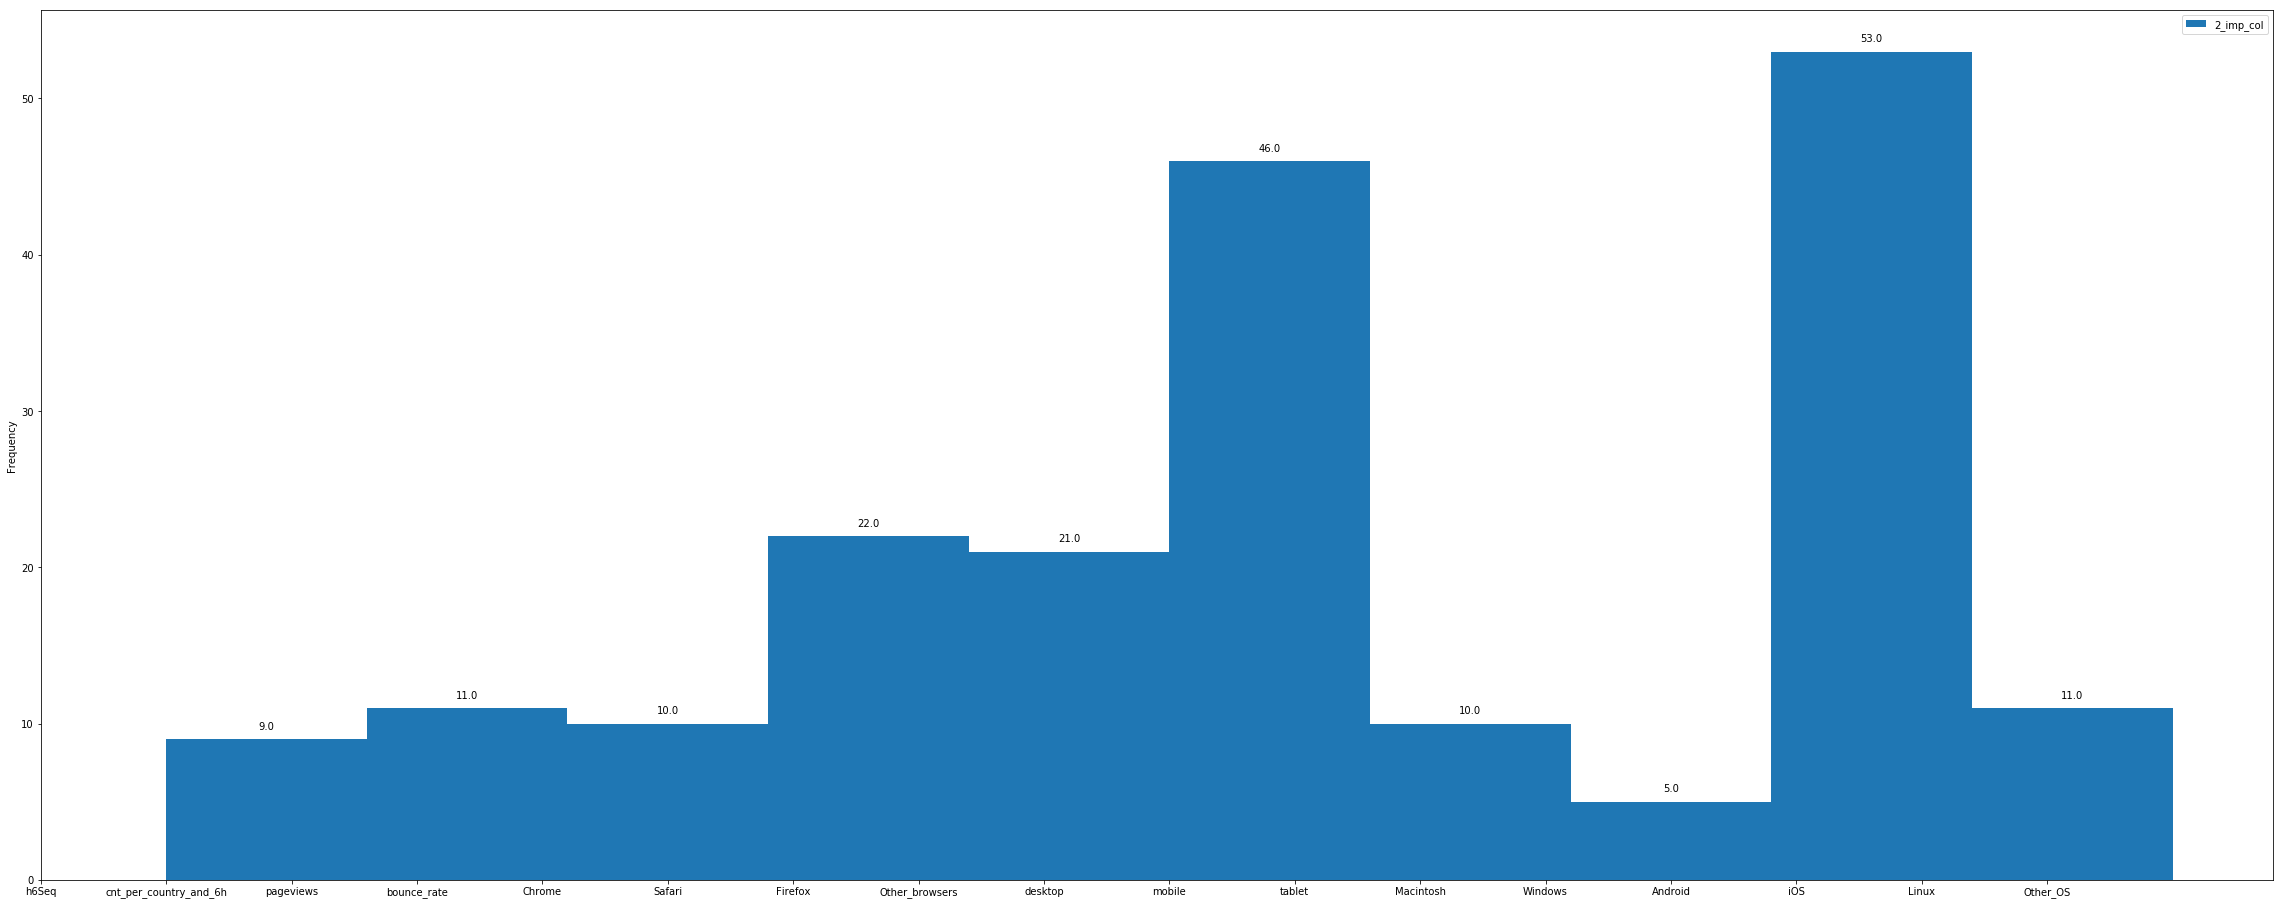

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,16)
ax = df_feat_imp.plot(y='2_imp_col', kind='hist')
ax.set_xticklabels(column_order)
positions = np.arange(len(column_order))

# Set the x-axis tick positions and labels
plt.xticks(positions, column_order)

for rect in ax.patches:
    height = rect.get_height()
    x = rect.get_x() + rect.get_width() / 2
    y = height + 0.5
    ax.text(x, y, height, ha='center', va='bottom')

plt.show()
print()


In [37]:
import pandas as pd
import plotly.express as px
df = df_feat_imp


col_to_check = "2_imp_col"
# Create a histogram chart with value counts
fig = px.histogram(df, x=col_to_check, nbins=20)

# Add value counts as text labels on top of the bars
fig.update_traces(textposition='outside', texttemplate='%{y}')

fig.update_xaxes(ticktext=column_order, tickvals=df[col_to_check].unique())

# Set chart title and labels
fig.update_layout(
    title='Histogram Chart',
    xaxis_title='Value',
    yaxis_title='Frequency'
)

# Show the chart
fig.show()


In [18]:
column_order = ['h6Seq',
 'cnt_per_country_and_6h',
 'pageviews',
 'bounce_rate',
 'Chrome',
 'Safari',
 'Firefox',
 'Other_browsers',
 'desktop',
 'mobile',
 'tablet',
 'Macintosh',
 'Windows',
 'Android',
 'iOS',
 'Linux',
 'Other_OS']


# Load actual dataset.

In [65]:
with open("data/processed/" + dataset + "_test.pkl", "rb") as f :
    test_df = pickle.load(f)
test_df

array([[ 879.   ,   17.   ,   60.   , ...,   17.647,   11.765,    0.   ],
       [ 880.   ,   31.   ,   82.   , ...,    9.677,    3.226,    6.452],
       [ 881.   ,   55.   ,  102.   , ...,    3.636,    9.091,    1.818],
       ...,
       [1462.   ,   52.   ,  168.   , ...,    7.692,    3.846,    1.923],
       [1463.   ,   16.   ,   39.   , ...,    6.25 ,   12.5  ,    6.25 ],
       [1464.   ,   33.   ,   73.   , ...,    0.   ,    0.   ,    0.   ]])

In [69]:
# cols to use for final model
len([
 'cnt_per_country_and_6h',
 'pageviews',
 'bounce_rate',
 'Chrome',
 'Safari',
 'Firefox',
 'desktop',
 'mobile',
 'tablet',
 'Macintosh',
 'Windows',
 'Android',
 'iOS',
 'Linux'])

14

In [66]:
column_order = ['h6Seq',
 'cnt_per_country_and_6h',
 'pageviews',
 'bounce_rate',
 'Chrome',
 'Safari',
 'Firefox',
 'Other_browsers',
 'desktop',
 'mobile',
 'tablet',
 'Macintosh',
 'Windows',
 'Android',
 'iOS',
 'Linux',
 'Other_OS']


In [67]:
df_test = pd.DataFrame(test_df,columns=column_order)

In [70]:
df_test.head()

,h6Seq,cnt_per_country_and_6h,pageviews,bounce_rate,Chrome,Safari,Firefox,Other_browsers,desktop,mobile,tablet,Macintosh,Windows,Android,iOS,Linux,Other_OS
0,879.0,17.0,60.0,0.294,76.471,23.529,0.000,0.000,52.941,35.294,11.765,5.882,35.294,29.412,17.647,11.765,0.000
1,880.0,31.0,82.0,0.452,61.290,12.903,6.452,19.355,58.065,41.935,0.000,3.226,45.161,32.258,9.677,3.226,6.452
2,881.0,55.0,102.0,0.636,78.182,5.455,5.455,10.909,60.000,38.182,1.818,5.455,45.455,34.545,3.636,9.091,1.818
3,882.0,30.0,60.0,0.767,66.667,16.667,6.667,10.000,53.333,43.333,3.333,6.667,43.333,33.333,13.333,3.333,0.000
4,883.0,10.0,17.0,0.700,50.000,0.000,10.000,40.000,60.000,40.000,0.000,20.000,30.000,40.000,0.000,0.000,10.000


# load test pickle file

In [61]:
with open("results/stack_predict_edited/analysis_results/test_score.pkl", "rb") as f :
    test_df = pickle.load(f)
test_df

array([8.813403, 9.502789, 9.246967, ..., 7.236697, 5.964839, 9.539878],
      dtype=float32)

In [63]:
test_df[:20]

array([ 8.813403 ,  9.502789 ,  9.246967 ,  6.378256 ,  6.182847 ,
        0.3808018,  9.917617 ,  9.404533 ,  1.4836462, -1.9892501,
        9.718972 ,  8.0137415,  5.581622 ,  8.330393 ,  9.480616 ,
        6.3507895,  7.173202 ,  6.1605906,  7.528184 , -9.0994005],
      dtype=float32)